In [1]:
%store -r word_df

import pickle
import pandas as pd
import numpy as np

# pickle.dump(word_df, fileObject)
# b = pickle.load(fileObject)

print(word_df.shape)
print(word_df.head())



(989, 5)
  search_word                                        description  \
0     Siemens  15 Things You Didn't Know About SIEMENS | SUBS...   
1     Siemens  From digitalisation to automation, weƒ??re cha...   
2     Siemens  Are you interested in what Siemens does and wh...   
3     Siemens  The most powerful HVDC transformer in the worl...   
4     Siemens  Articolul complet pe site: https://cavaleria.r...   

                                                tags  \
0  ['Alux', 'Alux.com', 'Alux Youtube', 'luxury l...   
1  ['Siemens', 'Siemens UK', 'careers', 'jobs', '...   
2  ['SIEMENS', 'products', 'Energy', 'Healthcare'...   
3  ['Siemens', 'HVDC', 'Transformer', '1100kV', '...   
4  ['Cavaleria.ro', 'hacking', 'siemens', 'job', ...   

                                               title  target  
0            15 Things You Didn't Know About SIEMENS       0  
1                What is it like to work at Siemens?       0  
2                  Siemens - More than just business    

In [2]:
# #Check to see if these two columns are the same
#print(word_df['localized.title'].equals(word_df['title']))
#print(word_df['localized.description'].equals(word_df['description']))
#print(np.count_nonzero(word_df['localized.description']==(word_df['description'])))

In [3]:
# # Almost all descriptions are the same, so go ahead and drop one of the columns
# word_df = word_df.drop(columns=['localized.title'])
# word_df = word_df.drop(columns=['localized.description'])

In [4]:
sample = word_df[['description','tags','title']]


In [5]:
word_df.groupby('search_word').describe()

target                                               
                count      mean       std  min   25%  50%   75%  max
search_word                                                         
Siemens          50.0  0.100000  0.416497  0.0  0.00  0.0  0.00  2.0
cats             50.0  1.900000  1.865366  0.0  0.00  1.5  3.75  5.0
christmas        50.0  1.820000  1.534501  0.0  0.00  2.0  3.00  5.0
donald trump     50.0  1.200000  1.069045  0.0  0.00  1.0  2.00  4.0
dude perfect     50.0  2.940000  2.410944  0.0  0.00  5.0  5.00  5.0
gaming           50.0  2.260000  1.337222  0.0  2.00  2.0  3.75  4.0
golf             50.0  0.920000  0.944155  0.0  0.00  1.0  1.00  4.0
horror           50.0  1.960000  1.524762  0.0  1.00  2.0  3.00  5.0
iphone           50.0  1.860000  1.428714  0.0  1.00  1.0  3.00  5.0
laugh            50.0  1.880000  1.437685  0.0  1.00  2.0  3.00  5.0
mac              50.0  1.220000  1.568699  0.0  0.00  1.0  2.00  5.0
mars             50.0  1.560000  1.145711  0.0  1.00  2.0  2.00  4.0
minecraft        50.0  2.160000  1.184250  0.0  1.25  2.0  3.00  4.0
movies           50.0  2.800000  1.818275  0.0  1.25  3.0  4.00  5.0
music            40.0  2.275000  2.112084  0.0  0.00  2.5  4.25  5.0
python           50.0  1.400000  1.538619  0.0  0.00  1.0  2.00  5.0
speedrun         50.0  1.160000  1.330337  0.0  0.00  1.0  2.00  4.0
sports           49.0  1.653061  1.422308  0.0  0.00  2.0  2.00  5.0
vacation         50.0  1.000000  1.442786  0.0  0.00  0.0  2.00  5.0
video blogging   50.0  0.200000  0.606092  0.0  0.00  0.0  0.00  3.0

In [6]:
word_df.head(5)

,search_word,description,tags,title,target
0,Siemens,15 Things You Didn't Know About SIEMENS | SUBS...,"['Alux', 'Alux.com', 'Alux Youtube', 'luxury l...",15 Things You Didn't Know About SIEMENS,0
1,Siemens,"From digitalisation to automation, weƒ??re cha...","['Siemens', 'Siemens UK', 'careers', 'jobs', '...",What is it like to work at Siemens?,0
2,Siemens,Are you interested in what Siemens does and wh...,"['SIEMENS', 'products', 'Energy', 'Healthcare'...",Siemens - More than just business,0
3,Siemens,The most powerful HVDC transformer in the worl...,"['Siemens', 'HVDC', 'Transformer', '1100kV', '...","Siemens presents: The first 1,100 kV HVDC Tran...",2
4,Siemens,Articolul complet pe site: https://cavaleria.r...,"['Cavaleria.ro', 'hacking', 'siemens', 'job', ...",Ce ??nseamnŽŸ sŽŸ lucrezi la Siemens - Cavaler...,0


In [7]:
word_df['description'] = word_df['description'].astype(str)
word_df['tags'] = word_df['tags'].astype(str)

In [8]:
import string

from nltk.corpus import stopwords
stop = stopwords.words('english')

In [9]:
exp1_df = pd.DataFrame()
exp1_df['title_char_count'] = word_df['title'].apply(len)
exp1_df['title_word_count'] = word_df['title'].apply(lambda x: len(x.split()))
exp1_df['title_word_density'] = exp1_df['title_char_count'] / (exp1_df['title_word_count']+1)
exp1_df['title_punctuation_count'] = word_df['title'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
exp1_df['title_title_word_count'] = word_df['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
exp1_df['title_upper_case_word_count'] = word_df['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
exp1_df['title_stopwords_count'] = word_df['title'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [10]:
exp1_df['desc_char_count'] = word_df['description'].apply(len)
exp1_df['desc_word_count'] = word_df['description'].apply(lambda x: len(x.split()))
exp1_df['desc_word_density'] = exp1_df['desc_char_count'] / (exp1_df['desc_word_count']+1)
exp1_df['desc_punctuation_count'] = word_df['description'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
exp1_df['desc_title_word_count'] = word_df['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
exp1_df['desc_upper_case_word_count'] = word_df['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
exp1_df['desc_stopwords_count'] = word_df['description'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [11]:

exp1_df['tags_char_count'] = word_df['tags'].apply(len)
exp1_df['tags_word_count'] = word_df['tags'].apply(lambda x: len(x.split()))
exp1_df['tags_word_density'] = exp1_df['tags_char_count'] / (exp1_df['tags_word_count']+1)
exp1_df['tags_punctuation_count'] = word_df['tags'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
exp1_df['tags_title_word_count'] = word_df['tags'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
exp1_df['tags_upper_case_word_count'] = word_df['tags'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
exp1_df['tags_stopwords_count'] = word_df['tags'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [12]:
# Add target column to experiment 1 dataframe
exp1_df['target'] = word_df['target']

In [13]:
exp1_df.head()

,title_char_count,title_word_count,title_word_density,title_punctuation_count,title_title_word_count,title_upper_case_word_count,title_stopwords_count,desc_char_count,desc_word_count,desc_word_density,...,desc_upper_case_word_count,desc_stopwords_count,tags_char_count,tags_word_count,tags_word_density,tags_punctuation_count,tags_title_word_count,tags_upper_case_word_count,tags_stopwords_count,target
0,39,7,4.875000,1,4,1,0,2589,238,10.832636,...,12,53,514,57,8.862069,90,11,0,3,0
1,35,8,3.888889,1,2,0,4,535,81,6.524390,...,2,31,162,15,10.125000,34,2,1,0,0
2,33,6,4.714286,1,2,0,2,293,46,6.234043,...,0,18,161,14,10.733333,35,5,1,0,0
3,68,10,6.181818,4,3,1,0,362,49,7.240000,...,2,16,96,9,9.600000,25,4,1,0,2
4,51,8,5.666667,4,2,0,0,207,14,13.800000,...,3,0,204,21,9.272727,44,0,0,0,0


In [14]:
#Take a look at title word count distrubtion

exp1_df['title_word_count'].plot(bins=50,kind = 'hist')
print('Observe frequency of title length.  Appears right skewed - average title length is 9.6 words')

exp1_df['title_word_count'].describe()

Observe frequency of title length.  Appears right skewed - average title length is 9.6 words


count    989.000000
mean       9.688574
std        3.804972
min        1.000000
25%        7.000000
50%        9.000000
75%       12.000000
max       28.000000
Name: title_word_count, dtype: float64

Observe frequency of description word count.  Appears right skewed - average description length is 148 words


count    989.000000
mean     148.193124
std      140.267761
min        0.000000
25%       47.000000
50%      110.000000
75%      197.000000
max      840.000000
Name: desc_word_count, dtype: float64

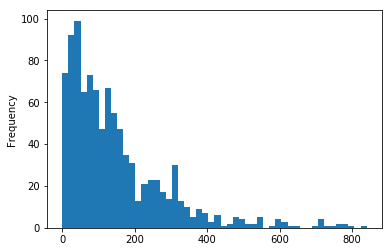

In [15]:
#Take a look at title word count distrubtion

exp1_df['desc_word_count'].plot(bins=50,kind = 'hist')
print('Observe frequency of description word count.  Appears right skewed - average description length is 148 words')

exp1_df['desc_word_count'].describe()

Observe frequency of tags word count. Average description length is 43.5 words


count    989.000000
mean      43.445905
std       24.918742
min        1.000000
25%       22.000000
50%       47.000000
75%       65.000000
max       98.000000
Name: tags_word_count, dtype: float64

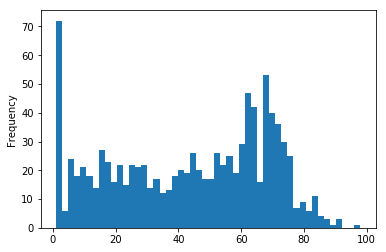

In [16]:
#Take a look at title word count distrubtion

exp1_df['tags_word_count'].plot(bins=50,kind = 'hist')
print('Observe frequency of tags word count. Average description length is 43.5 words')

exp1_df['tags_word_count'].describe()

Title Density is smaller.  This is to be expected since there will be fewer word counts in a title


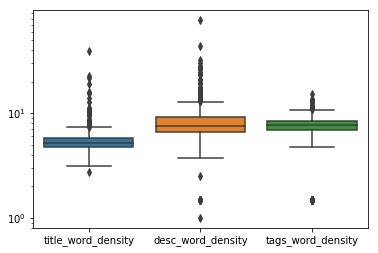

In [17]:
import seaborn as sns

#Study word density from three columns
stats_df = exp1_df[['title_word_density','desc_word_density','tags_word_density']].copy()
ax = sns.boxplot(data=stats_df)
ax.set(yscale="log")
print('Title Density is smaller.  This is to be expected since there will be fewer word counts in a title')


black belt videos have fewer characters


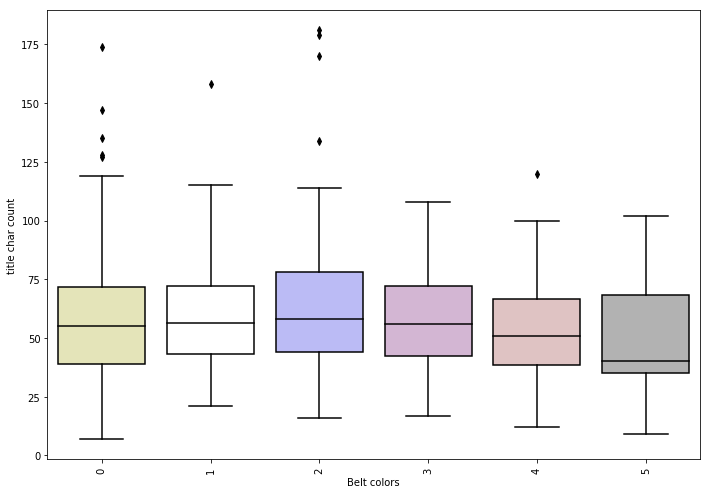

In [18]:
# Do densities impact belt ranking?

import matplotlib.pyplot as plt

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='title_char_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("title char count")
print('black belt videos have fewer characters')

black belt videos have fewer words


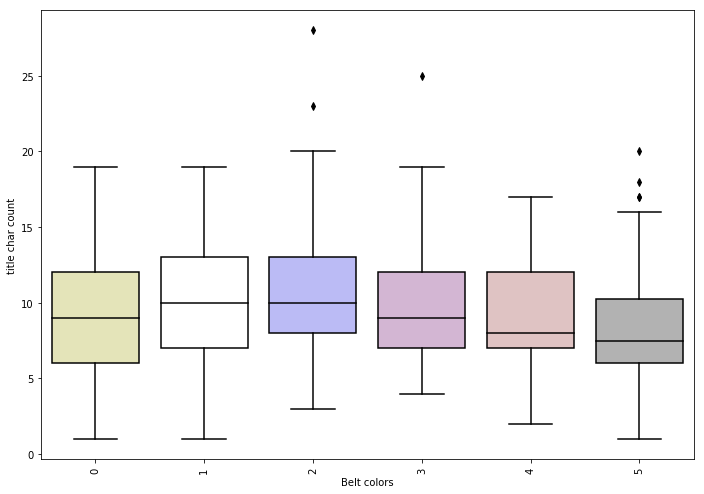

In [19]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='title_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("title char count")
print('black belt videos have fewer words')

disregard this data for now.


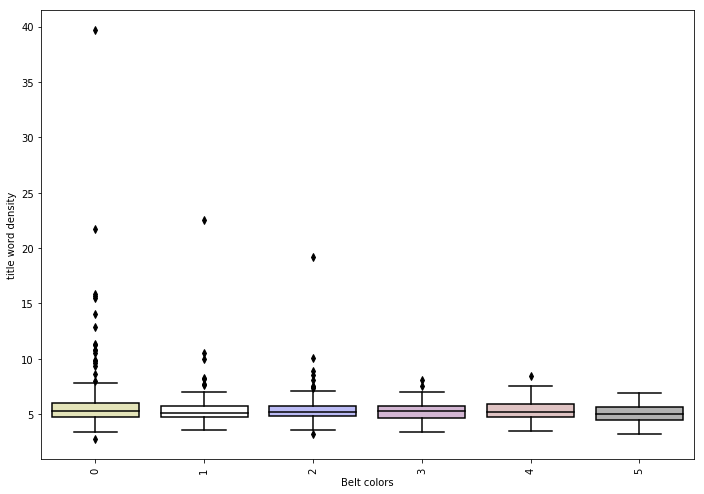

In [20]:
dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='title_word_density', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("title word density")
print('disregard this data for now.')

black belt videos have fewer outliers in punctuation


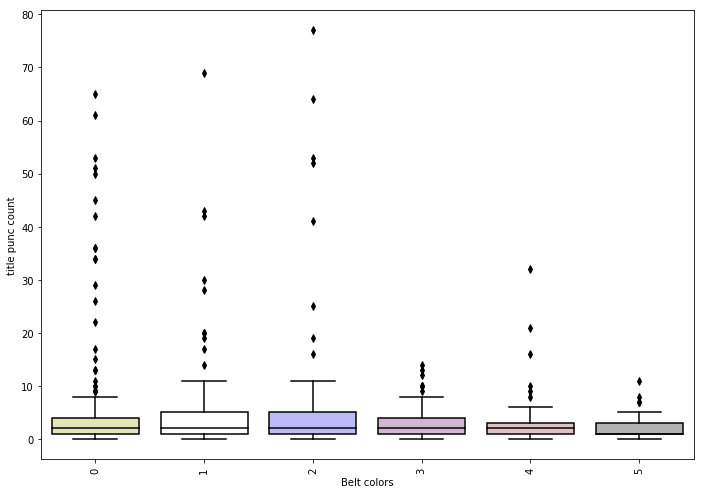

In [21]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='title_punctuation_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("title punc count")
print('black belt videos have fewer outliers in punctuation')

Disregard - no pattern


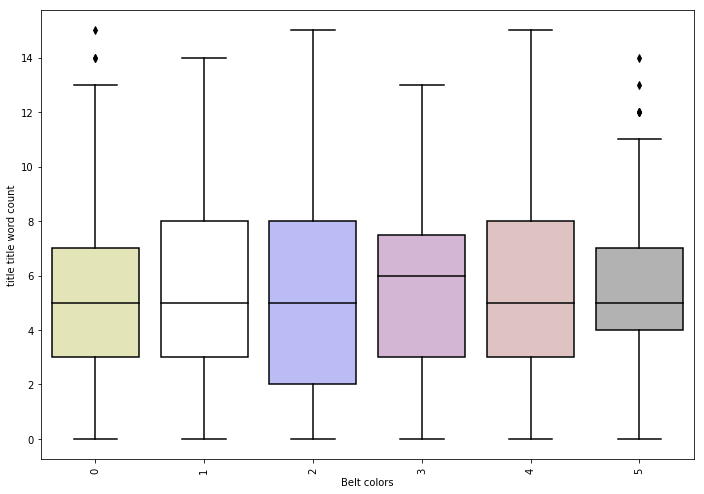

In [22]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='title_title_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("title title word count")
print('Disregard - no pattern')

Upside down parobola


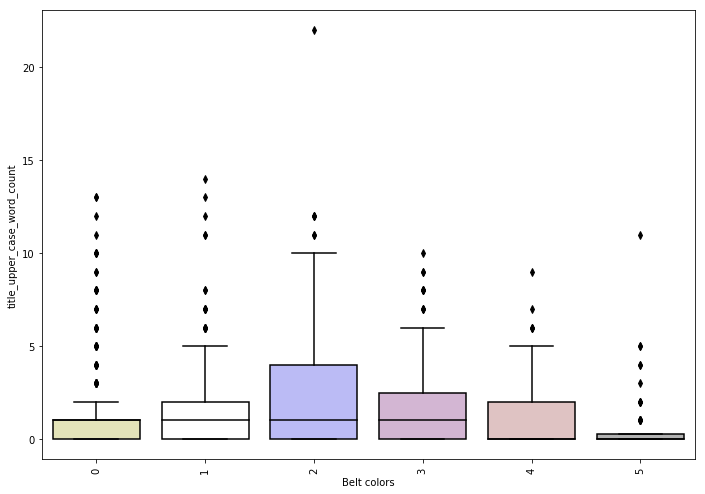

In [23]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='title_upper_case_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("title_upper_case_word_count")
print('Upside down parobola')

black belt video titles have lowest stop word avg


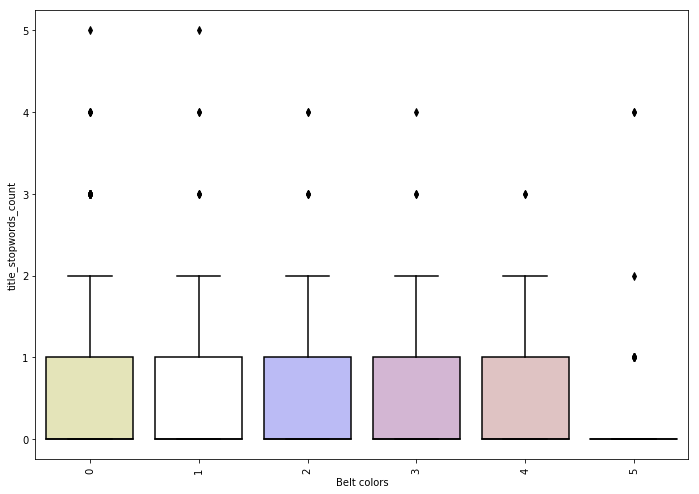

In [24]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='title_stopwords_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("title_stopwords_count")
print('black belt video titles have lowest stop word avg')

black belt videos have highest description char count


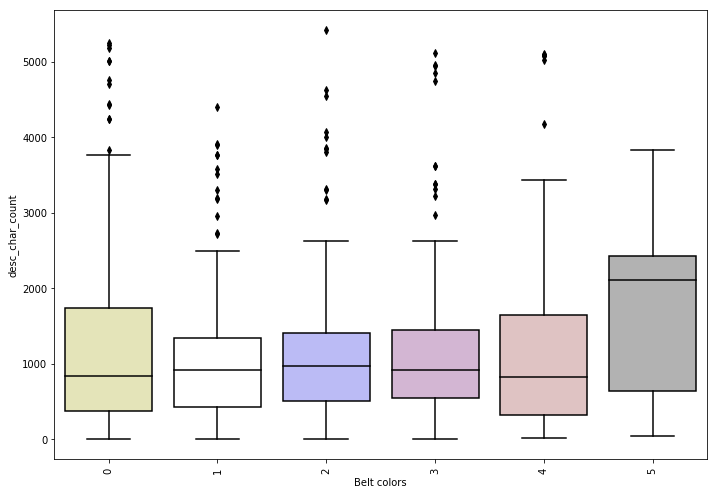

In [25]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='desc_char_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("desc_char_count")
print('black belt videos have highest description char count')

black belt videos have highest description word count avg and no outliers


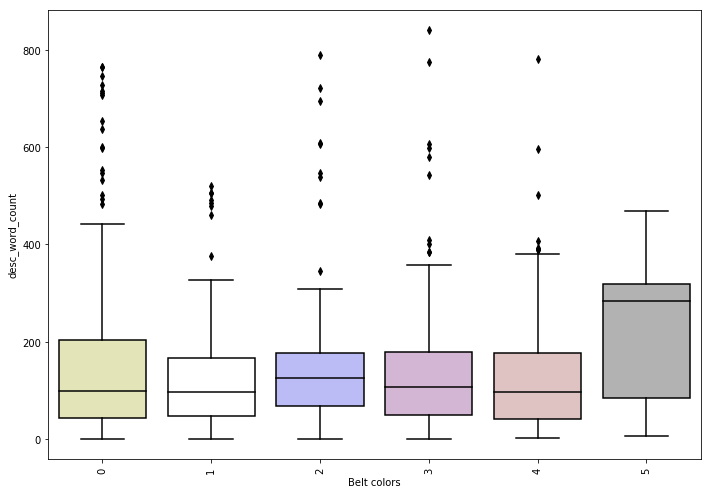

In [26]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='desc_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("desc_word_count")
print('black belt videos have highest description word count avg and no outliers')

black belt videos have highest description word count avg and no outliers


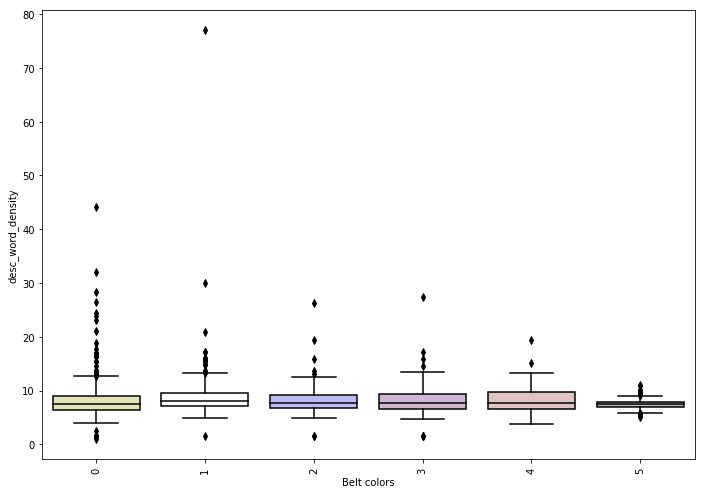

In [27]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='desc_word_density', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("desc_word_density")
print('black belt videos have highest description word count avg and no outliers')

black belt videos have highest punctuation count


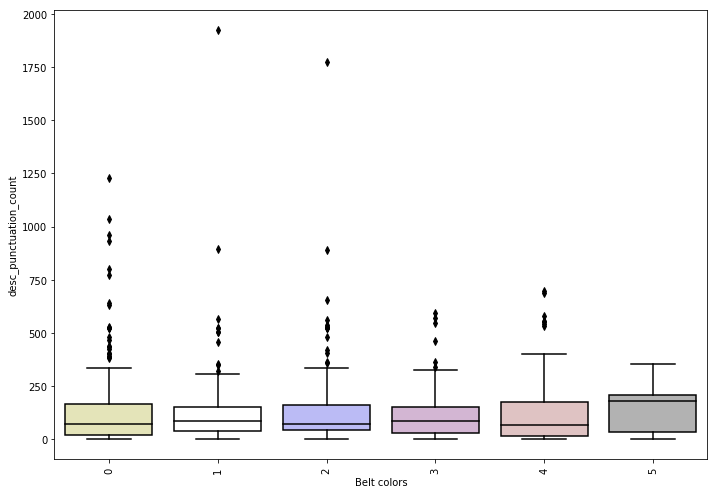

In [28]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='desc_punctuation_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("desc_punctuation_count")
print('black belt videos have highest punctuation count')

black belt videos have highest average words for first letter capitalized in desc


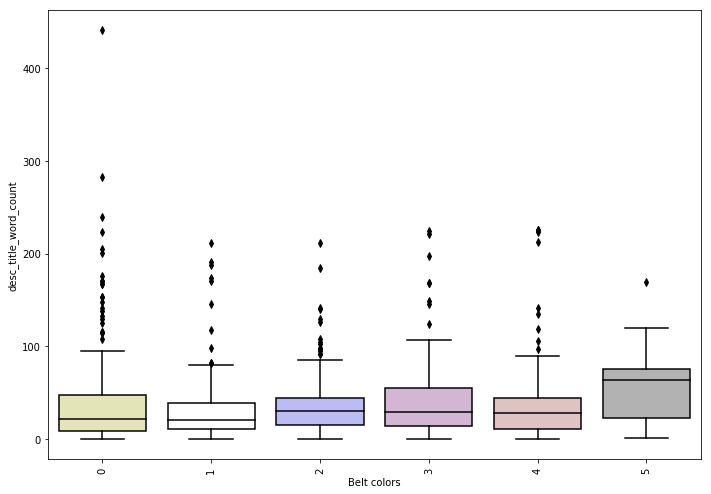

In [29]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='desc_title_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("desc_title_word_count")
print('black belt videos have highest average words for first letter capitalized in desc')

black belt videos have fewer completely upper case description words


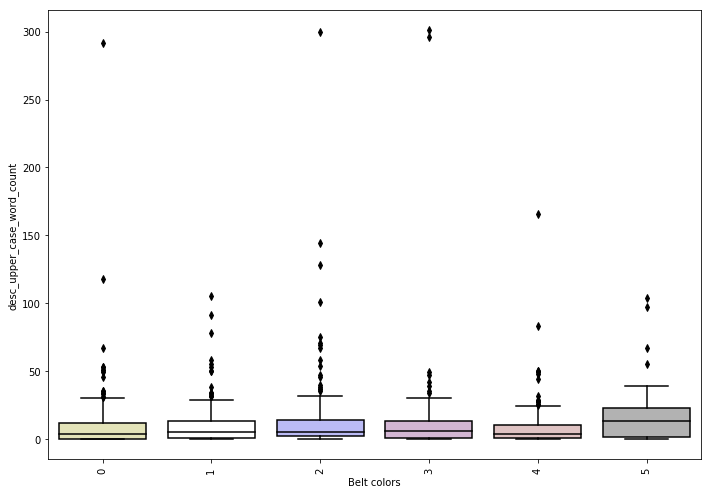

In [30]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='desc_upper_case_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("desc_upper_case_word_count")
print('black belt videos have fewer completely upper case description words')

black belt videos have MORE stop words on average inside description


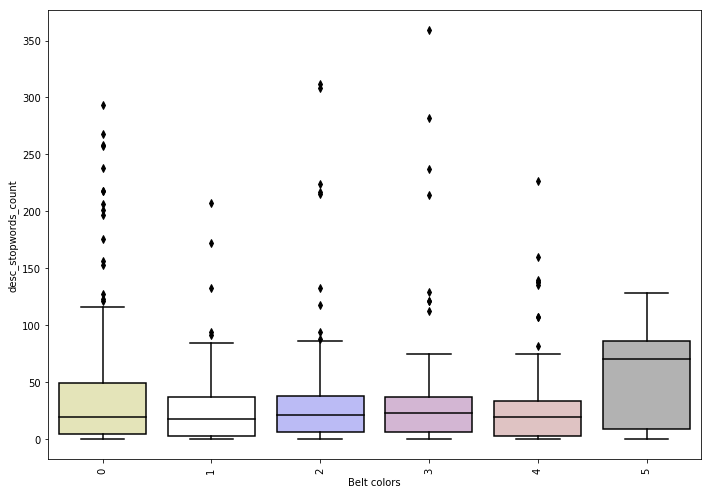

In [31]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='desc_stopwords_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("desc_stopwords_count")
print('black belt videos have MORE stop words on average inside description')

black belt videos have higher average for character tags count


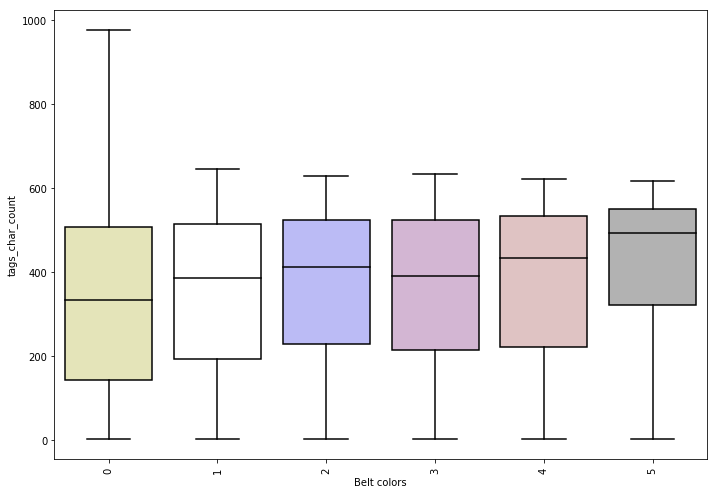

In [32]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='tags_char_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("tags_char_count")
print('black belt videos have higher average for character tags count')

black belt videos have higher average for # of words


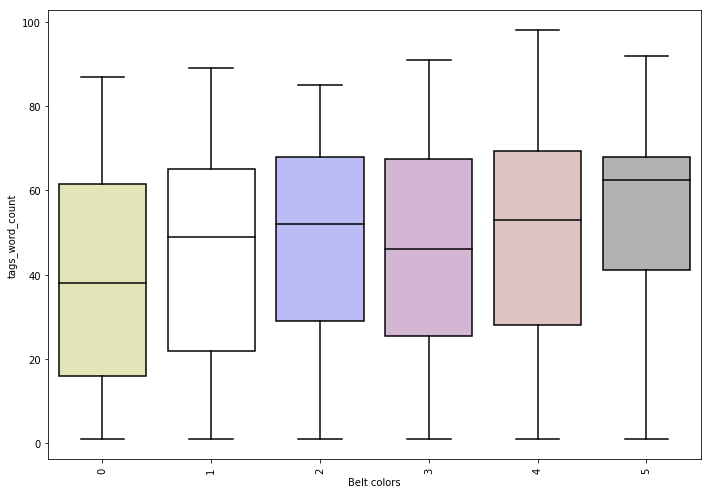

In [33]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='tags_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("tags_word_count")
print('black belt videos have higher average for # of words')

black belt videos have slightly higher word density average with a smaller range


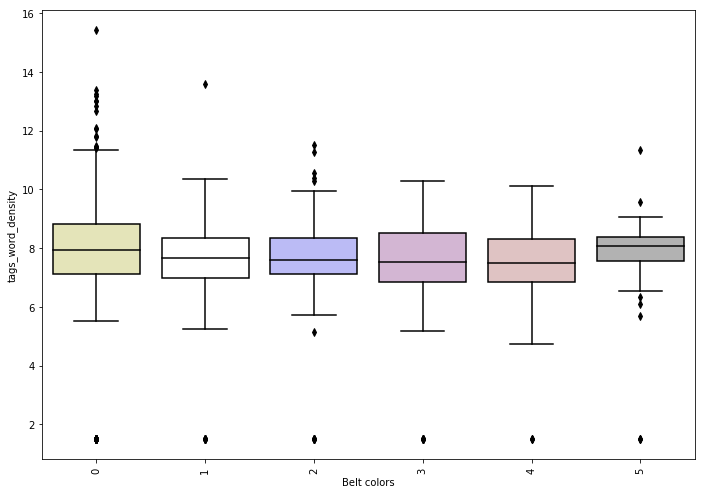

In [34]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='tags_word_density', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("tags_word_density")
print('black belt videos have slightly higher word density average with a smaller range')

black belt videos have slightly higher average for punctuation count in tags


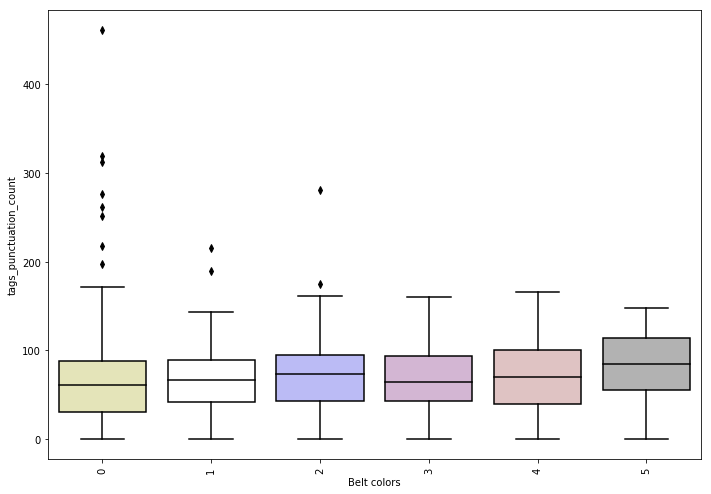

In [35]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='tags_punctuation_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("tags_punctuation_count")
print('black belt videos have slightly higher average for punctuation count in tags')

Disregard


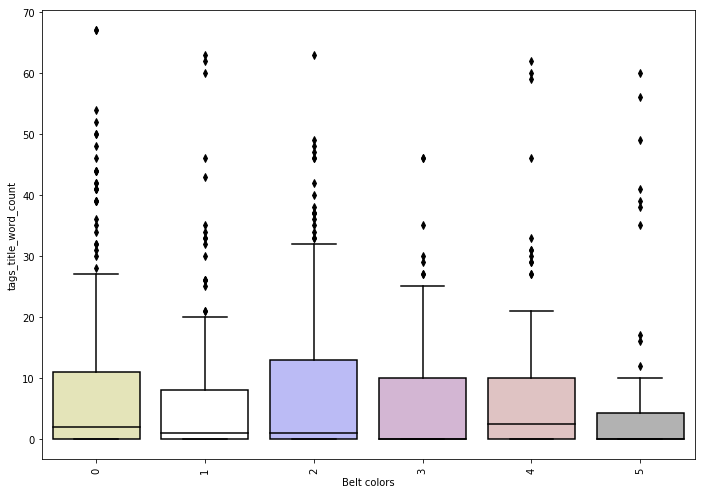

In [36]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='tags_title_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("tags_title_word_count")
print('Disregard')

black belt videos have fewer completely upper case tags


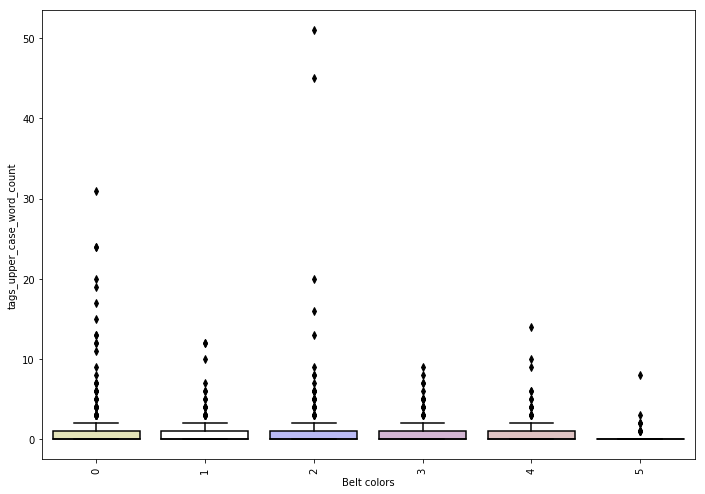

In [37]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='tags_upper_case_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("tags_upper_case_word_count")
print('black belt videos have fewer completely upper case tags')

Upside down parabola


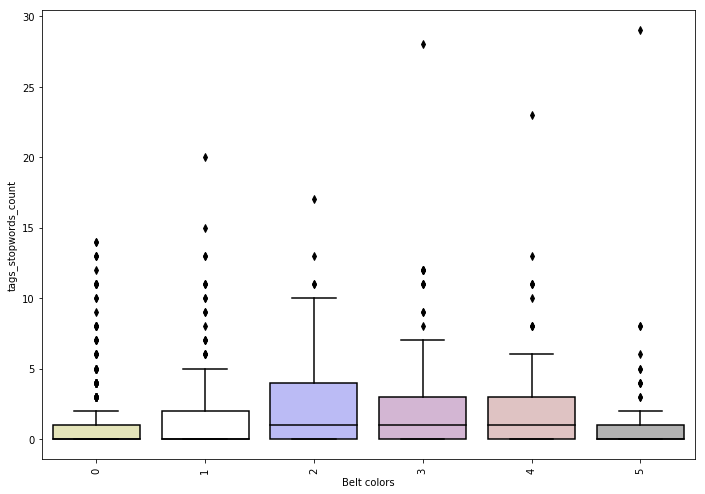

In [38]:
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='tags_stopwords_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("tags_stopwords_count")
print('Upside down parabola')

Interesting to see description word count leading, then tag count, then title count.


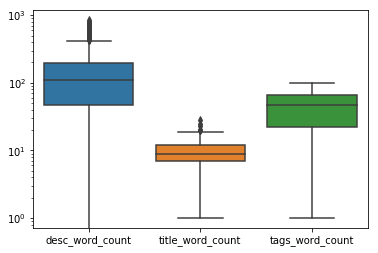

In [39]:
#boxplot shows likeCounts tends to be higher

stats_df = exp1_df[['desc_word_count','title_word_count','tags_word_count']].copy()
ax = sns.boxplot(data=stats_df)
ax.set(yscale="log")
print('Interesting to see description word count leading, then tag count, then title count.')

In [40]:
#add the relevent count features to num_df and use in notebook 6 Feature Union
%store -r num_df

num_df[['title_char_count','title_word_count','title_punctuation_count','title_upper_case_word_count','title_stopwords_count','desc_char_count',
        'desc_word_count','desc_word_density','desc_punctuation_count','desc_title_word_count','desc_upper_case_word_count','desc_stopwords_count',
       'tags_char_count','tags_word_count','tags_word_density','tags_punctuation_count','tags_upper_case_word_count','tags_stopwords_count']] = exp1_df[['title_char_count',
       'title_word_count','title_punctuation_count','title_upper_case_word_count','title_stopwords_count','desc_char_count',
        'desc_word_count','desc_word_density','desc_punctuation_count','desc_title_word_count','desc_upper_case_word_count','desc_stopwords_count',
       'tags_char_count','tags_word_count','tags_word_density','tags_punctuation_count','tags_upper_case_word_count','tags_stopwords_count']]

print(num_df.info)

<bound method DataFrame.info of      search_word_Siemens  search_word_cats  search_word_christmas  \
0                      1                 0                      0   
1                      1                 0                      0   
2                      1                 0                      0   
3                      1                 0                      0   
4                      1                 0                      0   
5                      1                 0                      0   
6                      1                 0                      0   
7                      1                 0                      0   
8                      1                 0                      0   
9                      1                 0                      0   
10                     1                 0                      0   
11                     1                 0                      0   
12                     1                 0                      0   
13

In [41]:
%store word_df
%store exp1_df
%store num_df


Stored 'word_df' (DataFrame)
Stored 'exp1_df' (DataFrame)
Stored 'num_df' (DataFrame)
